In [71]:
!pip install missingno
# DATA ANALYSIS
import pandas as pd
import numpy as np

# DATA VISUALIZATION
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# UTILS
import warnings
import joblib
import os
from pathlib import Path
from IPython.display import display, Markdown, Latex

In [72]:
warnings.filterwarnings("ignore")

In [73]:
TARGET_COLUMN = "species"
MAIN_DATA_PATH = "C:/Users/lokes/Downloads/iris_extended.csv"

In [74]:
# DATA FRAME BIOGRAPHY
def dataFrameBio(df:pd.DataFrame):
    display(Markdown("<h2>Columns:</h2>"))
    print(list(df.columns))
    
    display(Markdown("<h2>Rows:</h2>"))
    print(len(df))
    
    display(Markdown("<h2>Data Types:</h2>"))
    print(df.dtypes)
    
    display(Markdown("<h2>Data Frame:</h2>"))
    display(df.head())
    
    display(Markdown("<h2>Statistics:<h2>"))
    display(df.describe())
    
    display(Markdown("<h2>Missing Values:</h2>"))
    msno.matrix(df)

In [75]:
df_original = pd.read_csv("C:/Users/lokes/Downloads/Irisdata/iris.csv")
df_extended = pd.read_csv("C:/Users/lokes/Downloads/iris_extended.csv")

<h2>Columns:</h2>

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


<h2>Rows:</h2>

150


<h2>Data Types:</h2>

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


<h2>Data Frame:</h2>

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<h2>Statistics:<h2>

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

<h2>Missing Values:</h2>

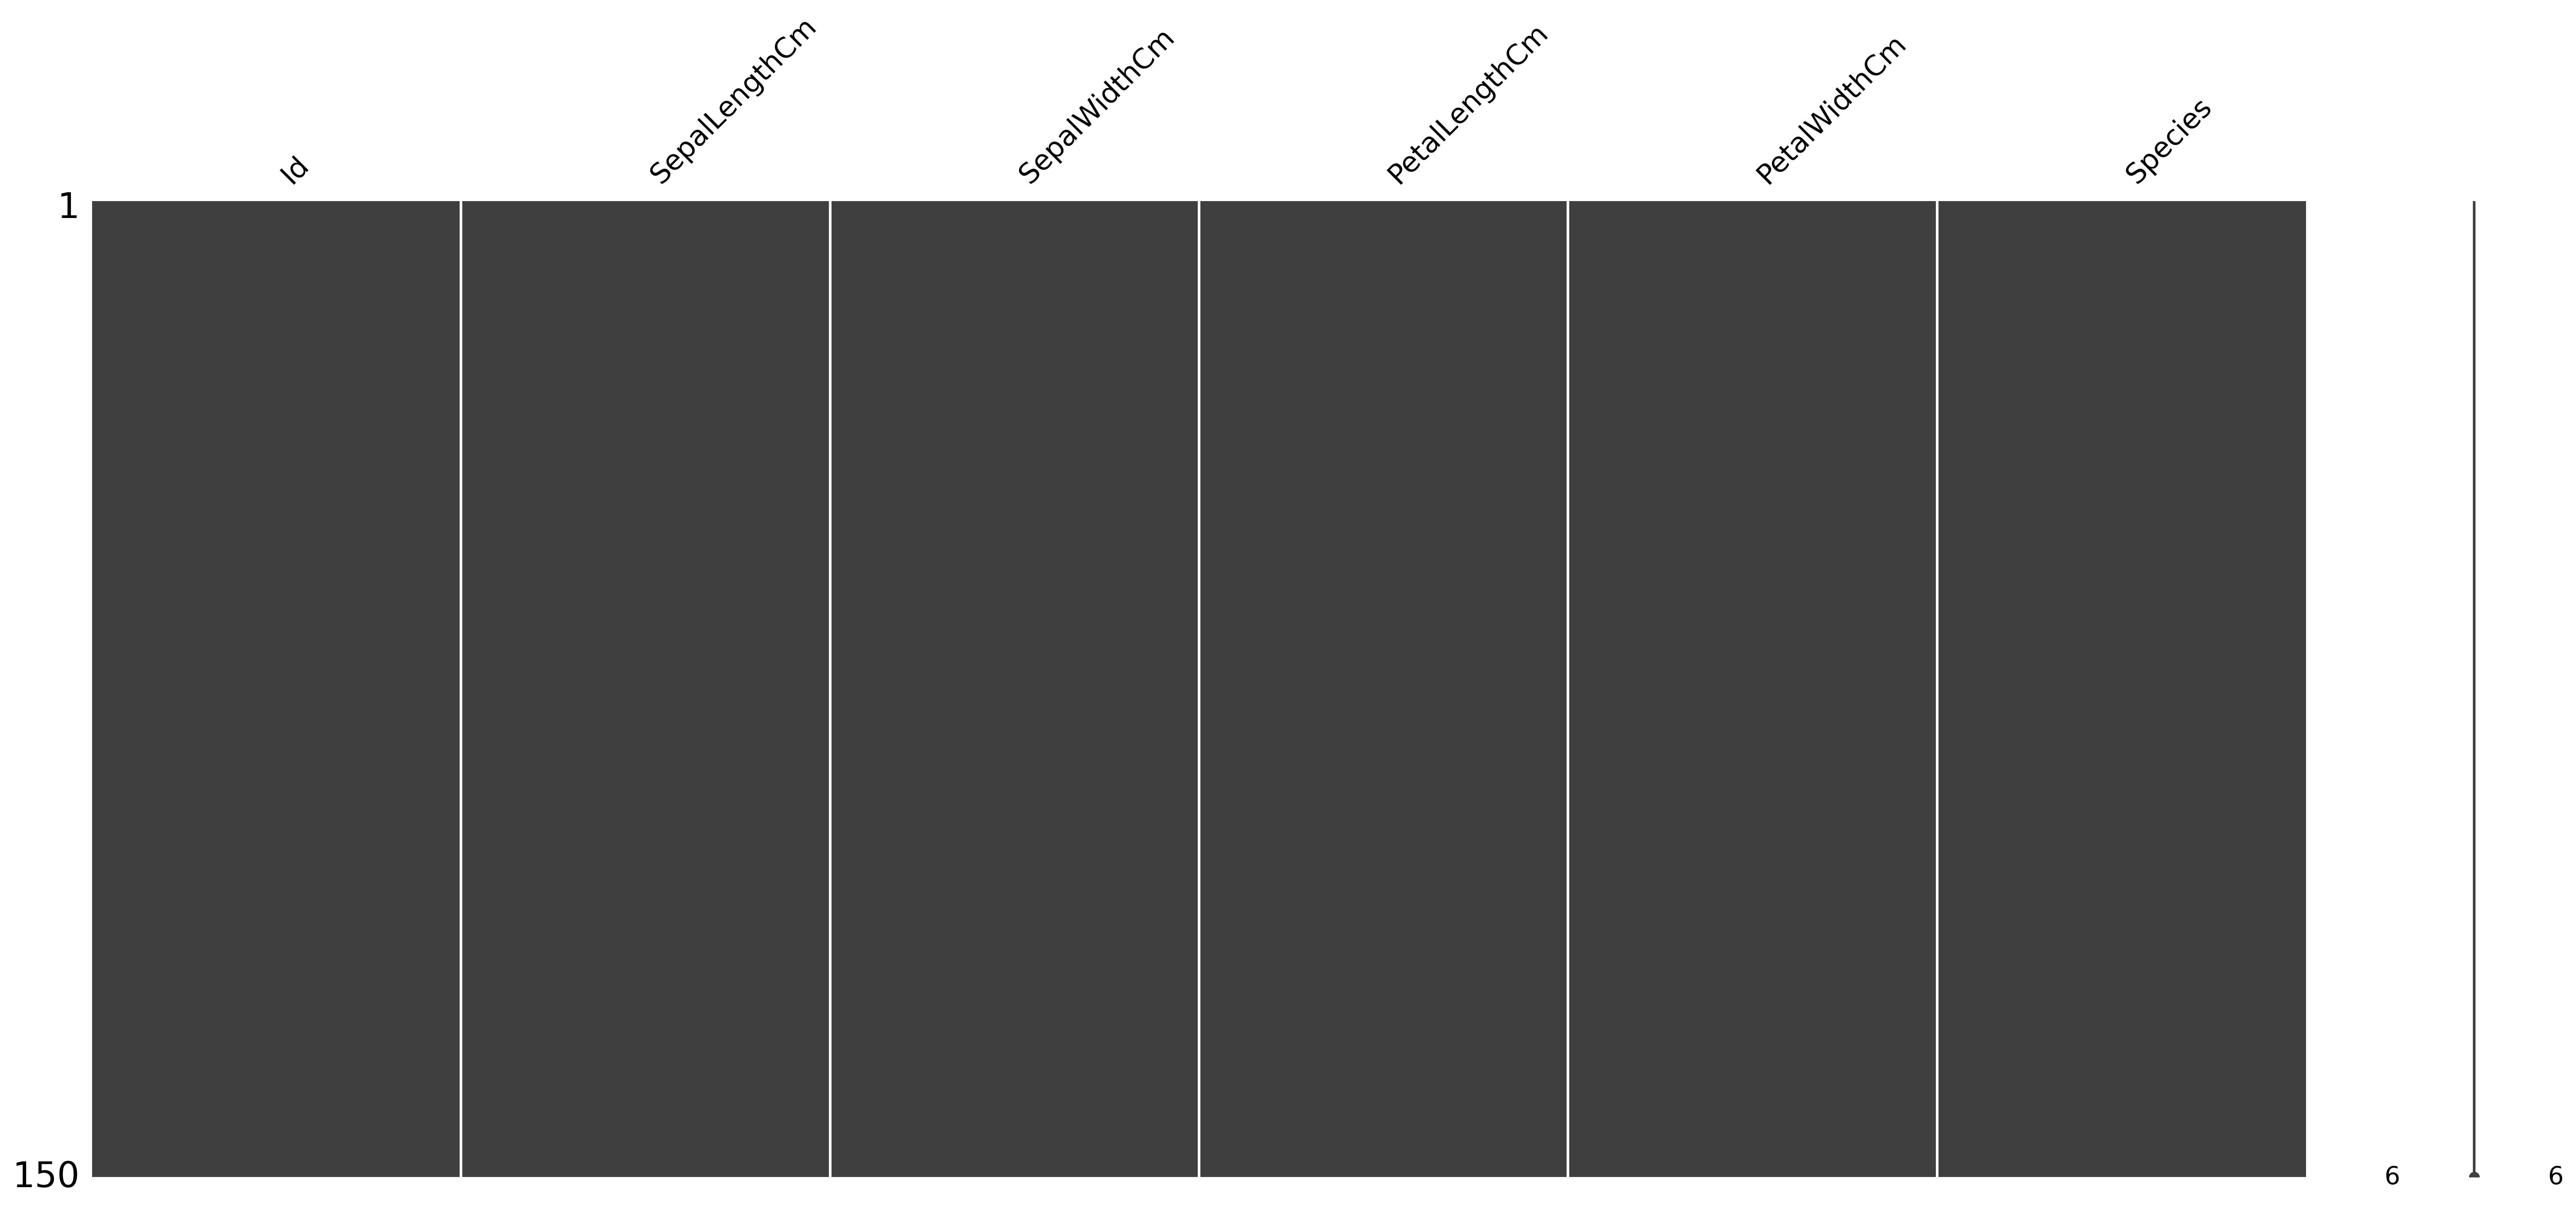

In [76]:
dataFrameBio(df_original)


<h2>Columns:</h2>

['species', 'elevation', 'soil_type', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios']


<h2>Rows:</h2>

1200


<h2>Data Types:</h2>

species                             object
elevation                          float64
soil_type                           object
sepal_length                       float64
sepal_width                        float64
petal_length                       float64
petal_width                        float64
sepal_area                         float64
petal_area                         float64
sepal_aspect_ratio                 float64
petal_aspect_ratio                 float64
sepal_to_petal_length_ratio        float64
sepal_to_petal_width_ratio         float64
sepal_petal_length_diff            float64
sepal_petal_width_diff             float64
petal_curvature_mm                 float64
petal_texture_trichomes_per_mm2    float64
leaf_area_cm2                      float64
sepal_area_sqrt                    float64
petal_area_sqrt                    float64
area_ratios                        float64
dtype: object


<h2>Data Frame:</h2>

species  elevation soil_type  sepal_length  sepal_width  petal_length  \
0  setosa      161.8     sandy          5.16         3.41          1.64   
1  setosa      291.4      clay          5.48         4.05          1.53   
2  setosa      144.3     sandy          5.10         2.80          1.47   
3  setosa      114.6      clay          4.64         3.44          1.53   
4  setosa      110.9     loamy          4.85         2.87          1.23   

   petal_width  sepal_area  petal_area  sepal_aspect_ratio  ...  \
0         0.26     17.5956      0.4264            1.513196  ...   
1         0.37     22.1940      0.5661            1.353086  ...   
2         0.38     14.2800      0.5586            1.821429  ...   
3         0.17     15.9616      0.2601            1.348837  ...   
4         0.26     13.9195      0.3198            1.689895  ...   

   sepal_to_petal_length_ratio  sepal_to_petal_width_ratio  \
0                     3.146341                   13.115385   
1                     3.581699                   10.945946   
2                     3.469388                    7.368421   
3                     3.032680                   20.235294   
4                     3.943089                   11.038462   

   sepal_petal_length_diff  sepal_petal_width_diff  petal_curvature_mm  \
0                     3.52                    3.15                5.33   
1                     3.95                    3.68                5.90   
2                     3.63                    2.42                5.66   
3                     3.11                    3.27                4.51   
4                     3.62                    2.61                4.03   

   petal_texture_trichomes_per_mm2  leaf_area_cm2  sepal_area_sqrt  \
0                            18.33          53.21         4.194711   
1                            20.45          52.53         4.711051   
2                            24.62          50.25         3.778889   
3                            22.91          50.85         3.995197   
4                            21.56          40.57         3.730885   

   petal_area_sqrt  area_ratios  
0         0.652993    41.265478  
1         0.752396    39.205087  
2         0.747395    25.563910  
3         0.510000    61.367166  
4         0.565509    43.525641  

[5 rows x 21 columns]

<h2>Statistics:<h2>

elevation  sepal_length  sepal_width  petal_length  petal_width  \
count  1200.000000   1200.000000  1200.000000   1200.000000  1200.000000   
mean    173.543917      5.895900     3.052858      3.807950     1.189542   
std      72.461258      0.845579     0.527120      1.765469     0.728882   
min      50.100000      4.040000     1.700000      0.960000     0.050000   
25%     110.875000      5.210000     2.690000      1.640000     0.360000   
50%     171.300000      5.840000     3.030000      4.300000     1.290000   
75%     239.125000      6.520000     3.390000      5.200000     1.740000   
max     299.900000      9.120000     4.760000      7.840000     2.990000   

        sepal_area   petal_area  sepal_aspect_ratio  petal_aspect_ratio  \
count  1200.000000  1200.000000         1200.000000         1200.000000   
mean     17.870807     5.689068            2.003853            4.016732   
std       3.388978     4.585312            0.507508            2.070668   
min       9.048000     0.086000            0.978774            1.587379   
25%      15.554550     0.565825            1.639104            2.855016   
50%      17.646400     5.525400            1.970738            3.448642   
75%      20.007275     9.256725            2.293932            4.486058   
max      29.722600    23.128000            4.082902           34.400000   

       sepal_to_petal_length_ratio  sepal_to_petal_width_ratio  \
count                  1200.000000                 1200.000000   
mean                      1.996762                    5.422667   
std                       1.035622                    5.921786   
min                       0.745902                    0.841121   
25%                       1.223277                    1.650452   
50%                       1.442773                    2.170656   
75%                       3.059940                    9.251453   
max                       5.410000                   55.800000   

       sepal_petal_length_diff  sepal_petal_width_diff  petal_curvature_mm  \
count               1200.00000             1200.000000         1200.000000   
mean                   2.08795                1.863317            8.355267   
std                    1.27443                1.004847            3.172975   
min                   -1.55000               -0.340000            3.310000   
25%                    1.14000                1.090000            5.310000   
50%                    1.95500                1.590000            7.925000   
75%                    3.29000                2.740000           10.715000   
max                    4.66000                4.560000           17.890000   

       petal_texture_trichomes_per_mm2  leaf_area_cm2  sepal_area_sqrt  \
count                      1200.000000    1200.000000      1200.000000   
mean                         15.052733      60.144650         4.208441   
std                           4.663109      10.224305         0.399956   
min                           3.830000      35.160000         3.007989   
25%                          11.280000      52.302500         3.943926   
50%                          15.020000      59.170000         4.200762   
75%                          18.527500      67.305000         4.472949   
max                          29.850000      86.930000         5.451844   

       petal_area_sqrt  area_ratios  
count      1200.000000  1200.000000  
mean          2.106480    15.755674  
std           1.119309    21.891577  
min           0.293258     0.818662  
25%           0.752213     2.005655  
50%           2.350617     3.059424  
75%           3.042487    30.764892  
max           4.809158   183.620930

<h2>Missing Values:</h2>

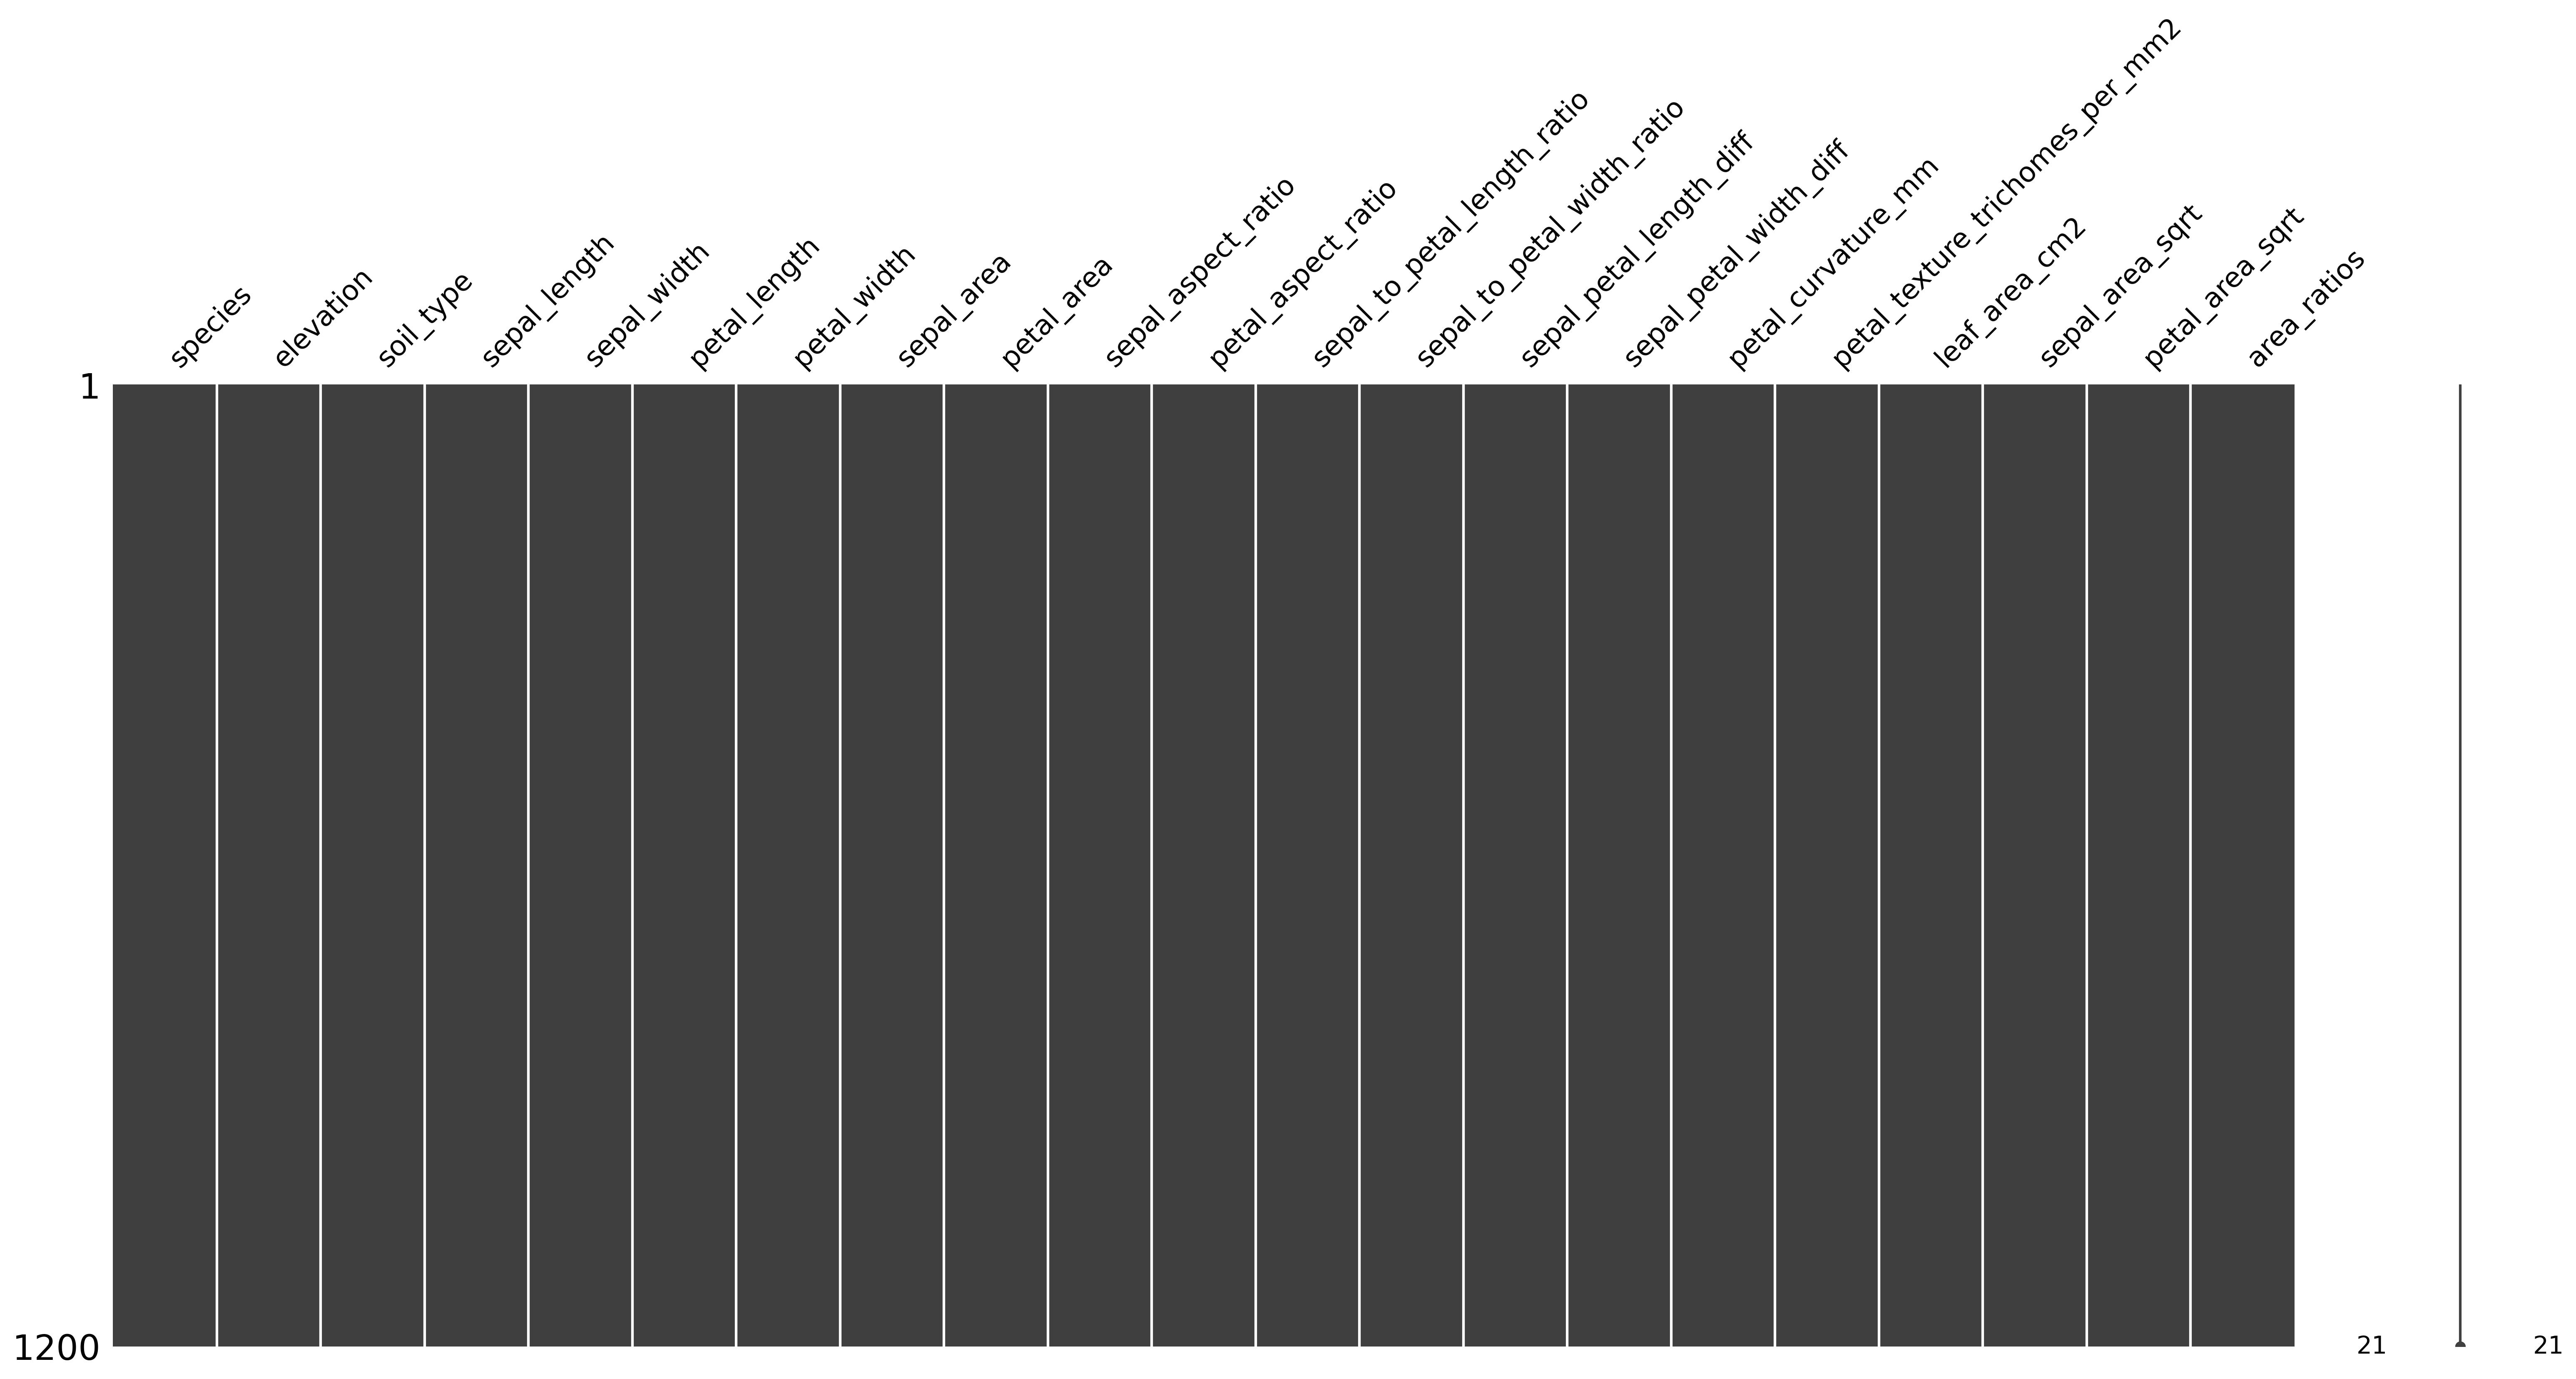

In [77]:
dataFrameBio(df_extended)

In [78]:
# CORRECTING COLUMN DATA TYPES
df_extended.species = df_extended.species.astype('category')
df_extended.soil_type = df_extended.soil_type.astype('category')

In [79]:
temp = df_extended.dtypes
num_columns = list(temp[temp == 'float64'].keys())
cat_feature_columns = ["soil_type"]

In [80]:
corr_mat = df_extended[num_columns].corr()
abs_corr_mat = abs(corr_mat)

In [81]:
abs_corr_mat.style.background_gradient()

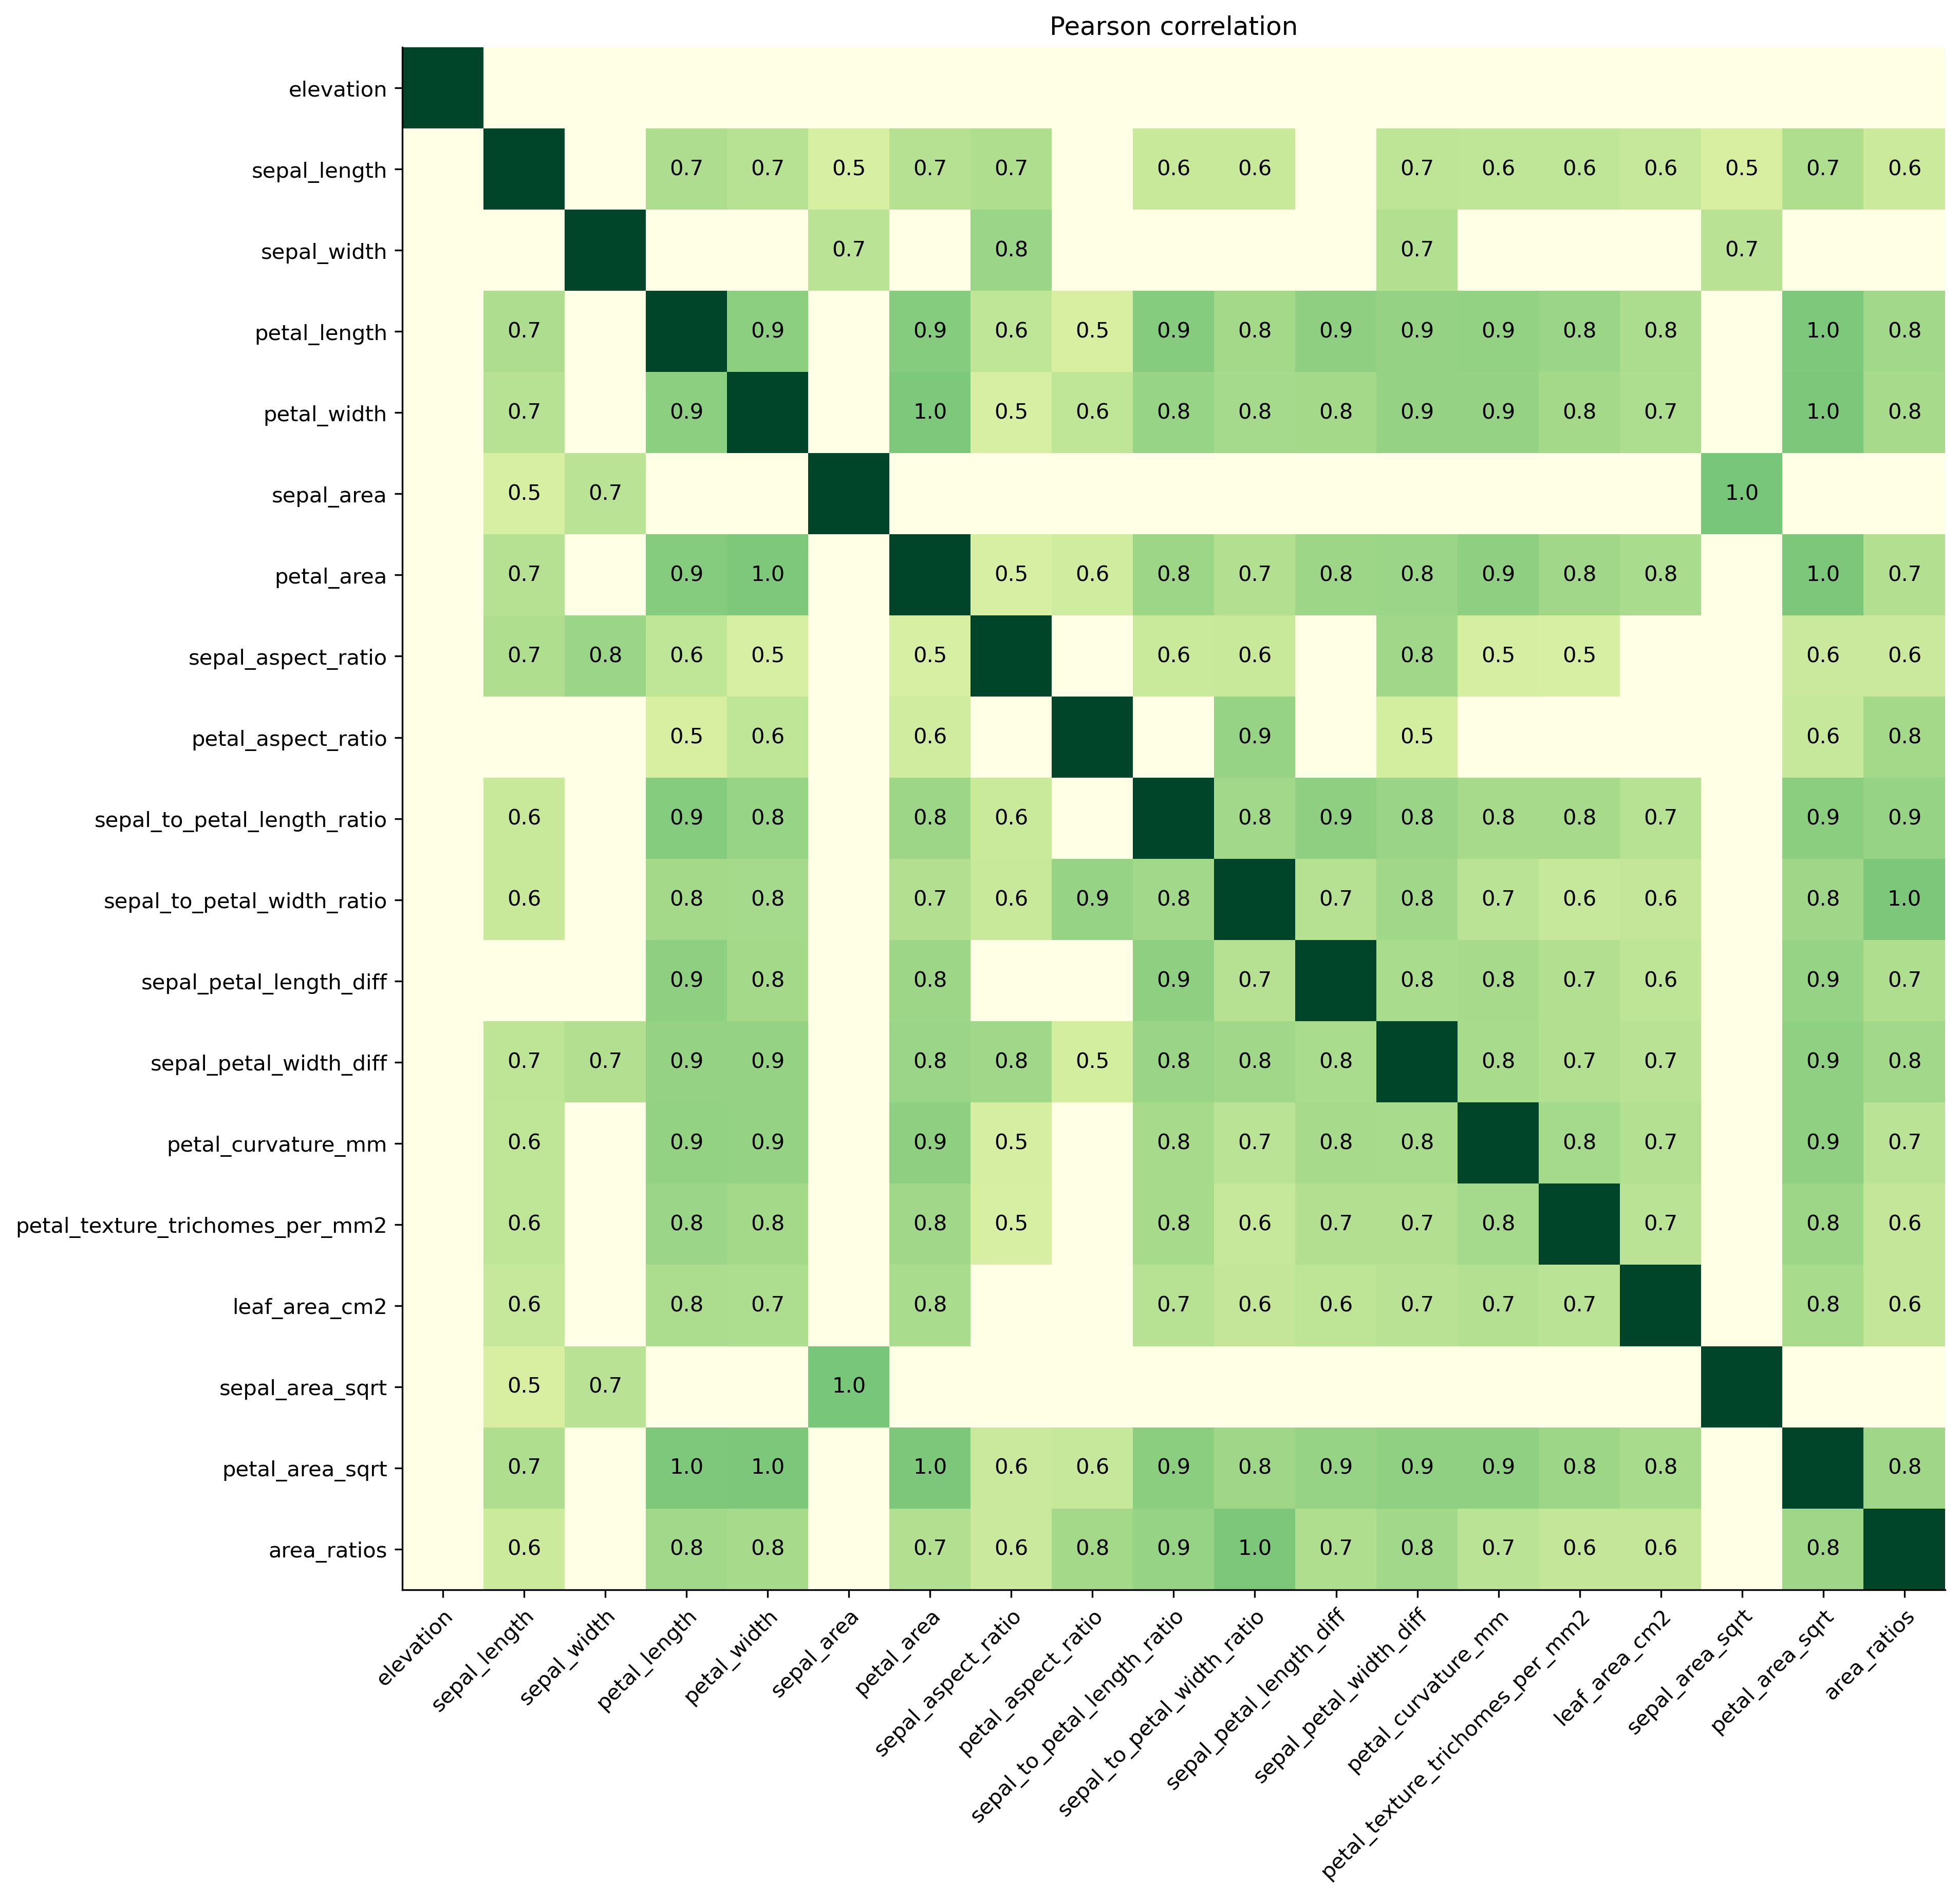

In [82]:
# DISCRETIZING
bin_abs_corr_mat = abs_corr_mat.copy()
# INVALID
bin_abs_corr_mat[bin_abs_corr_mat == 1] = 2
# TOO LOW
bin_abs_corr_mat[bin_abs_corr_mat < 0.5] = 0
# PLOTTING
_tempDF = bin_abs_corr_mat
fig, ax = plt.subplots(figsize=(13, 13))
img = ax.imshow(_tempDF, cmap="YlGn")
for i in range(_tempDF.shape[0]):
    for j in range(_tempDF.shape[1]):
        val = round(_tempDF[num_columns[i]][num_columns[j]], 1)
        if val != 0 and val != 2:
            text = img.axes.text(
                j,
                i,
                val,
                horizontalalignment="center",
                verticalalignment="center",
            )
ax.set_xticks(np.arange(len(num_columns)), labels=num_columns)
ax.set_yticks(np.arange(len(num_columns)), labels=num_columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Pearson correlation")
plt.show()

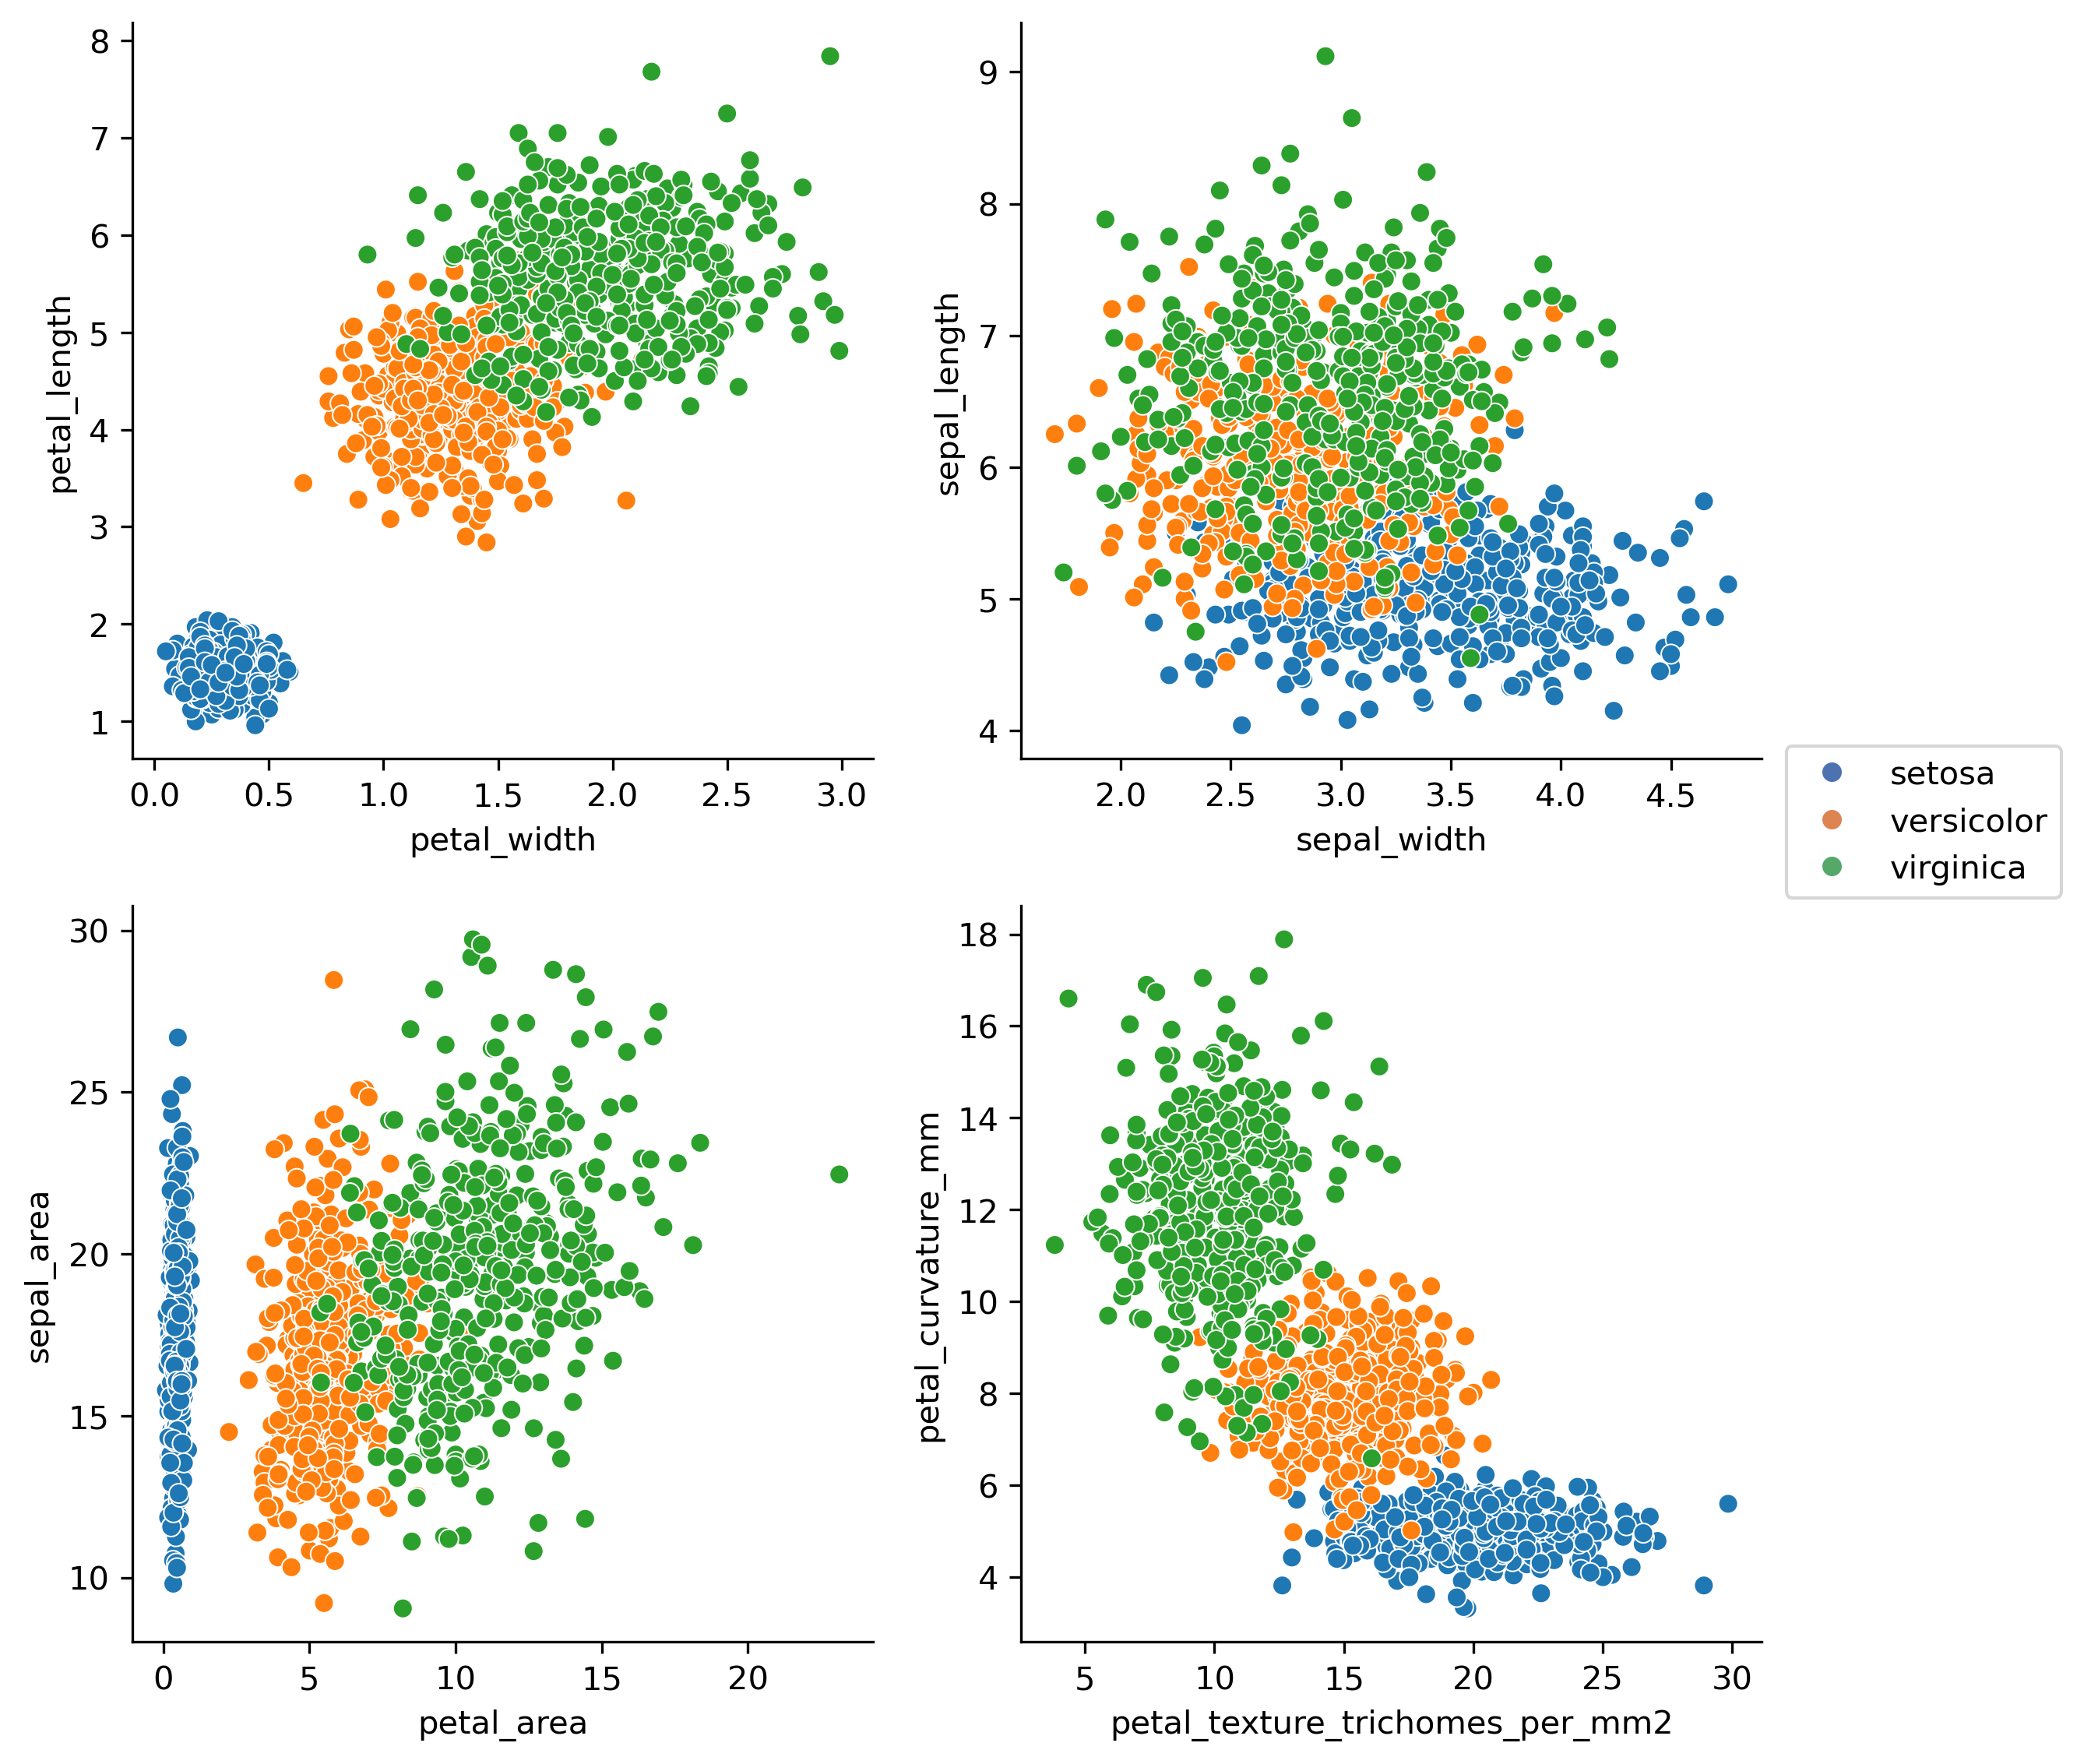

In [83]:
from  matplotlib.lines import  Line2D
figure, axes = plt.subplots(2, 2, figsize=(9, 9)) 
# For Sine Function 
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','petal_curvature_mm', 'petal_texture_trichomes_per_mm2','sepal_area', 'petal_area']]
p1=Line2D([], [], color=sns.color_palette("deep")[0], marker='.', ls='', label='setosa',markersize=10)
p2=Line2D([], [], color=sns.color_palette("deep")[1], marker='.', ls='', label='versicolor',markersize=10)
p3=Line2D([], [], color=sns.color_palette("deep")[2], marker='.', ls='', label='virginica',markersize=10)

sns.scatterplot(ax=axes[0, 0], data=df, hue='species', y='petal_length', x='petal_width', legend=False)
sns.scatterplot(ax=axes[0, 1], data=df, hue='species', y='sepal_length', x='sepal_width', legend=False)
sns.scatterplot(ax=axes[1, 0], data=df, hue='species', y='sepal_area', x='petal_area', legend=False)
sns.scatterplot(ax=axes[1, 1], data=df, hue='species', y='petal_curvature_mm', x='petal_texture_trichomes_per_mm2', legend=False)
plt.figlegend(handles=[p1,p2,p3], loc="right", fontsize=10,bbox_to_anchor=(1.05, 0.5, 0, 0))
plt.show()

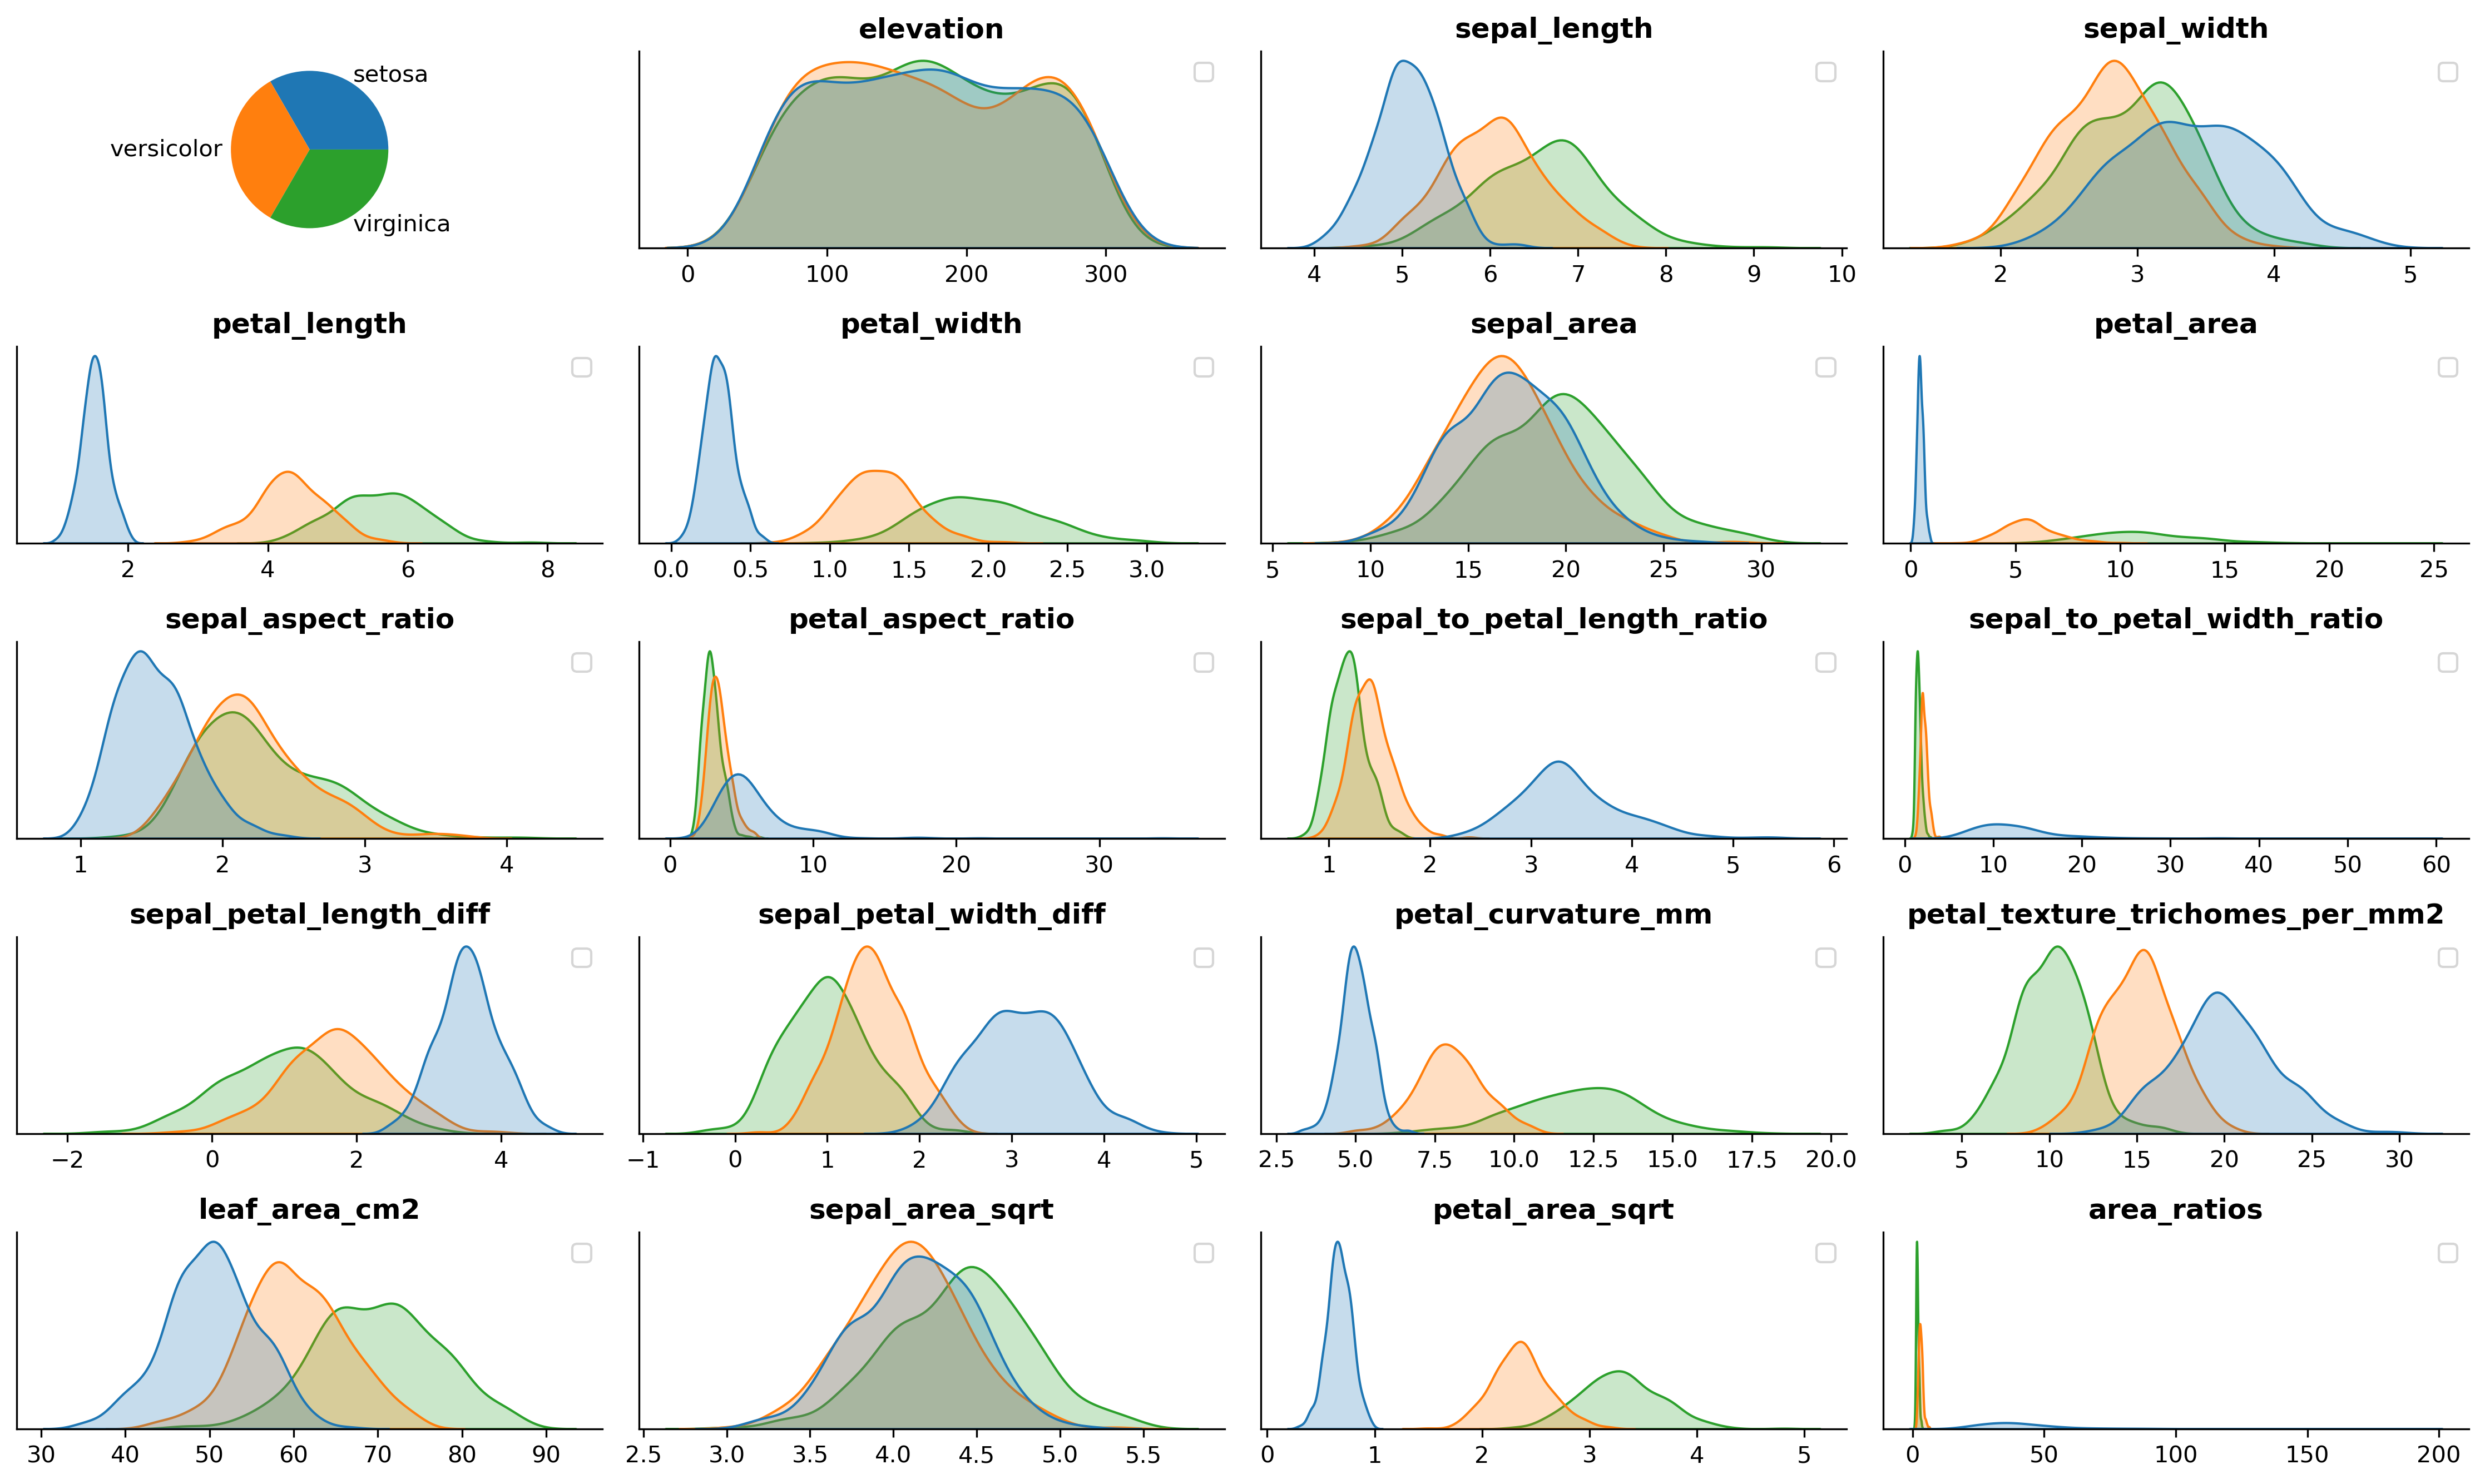

In [84]:
plt.figure(figsize=(15,9))
num_columns = df.drop(['species','soil_type'], axis=1)
plt.subplot(5,4,1)
df.species.value_counts().plot.pie()
plt.ylabel('')
for i, feature in enumerate(num_columns):
    plt.subplot(5,4,i+2)
    #sns.boxenplot(x=df_raw[feature], y=df_raw.species)
    sns.kdeplot(df, x=df[feature], hue='species', fill=True)
    plt.ylabel('')
    plt.yticks([])
    plt.xlabel('')
    plt.legend('')
    plt.title(feature, weight='bold')
plt.tight_layout()

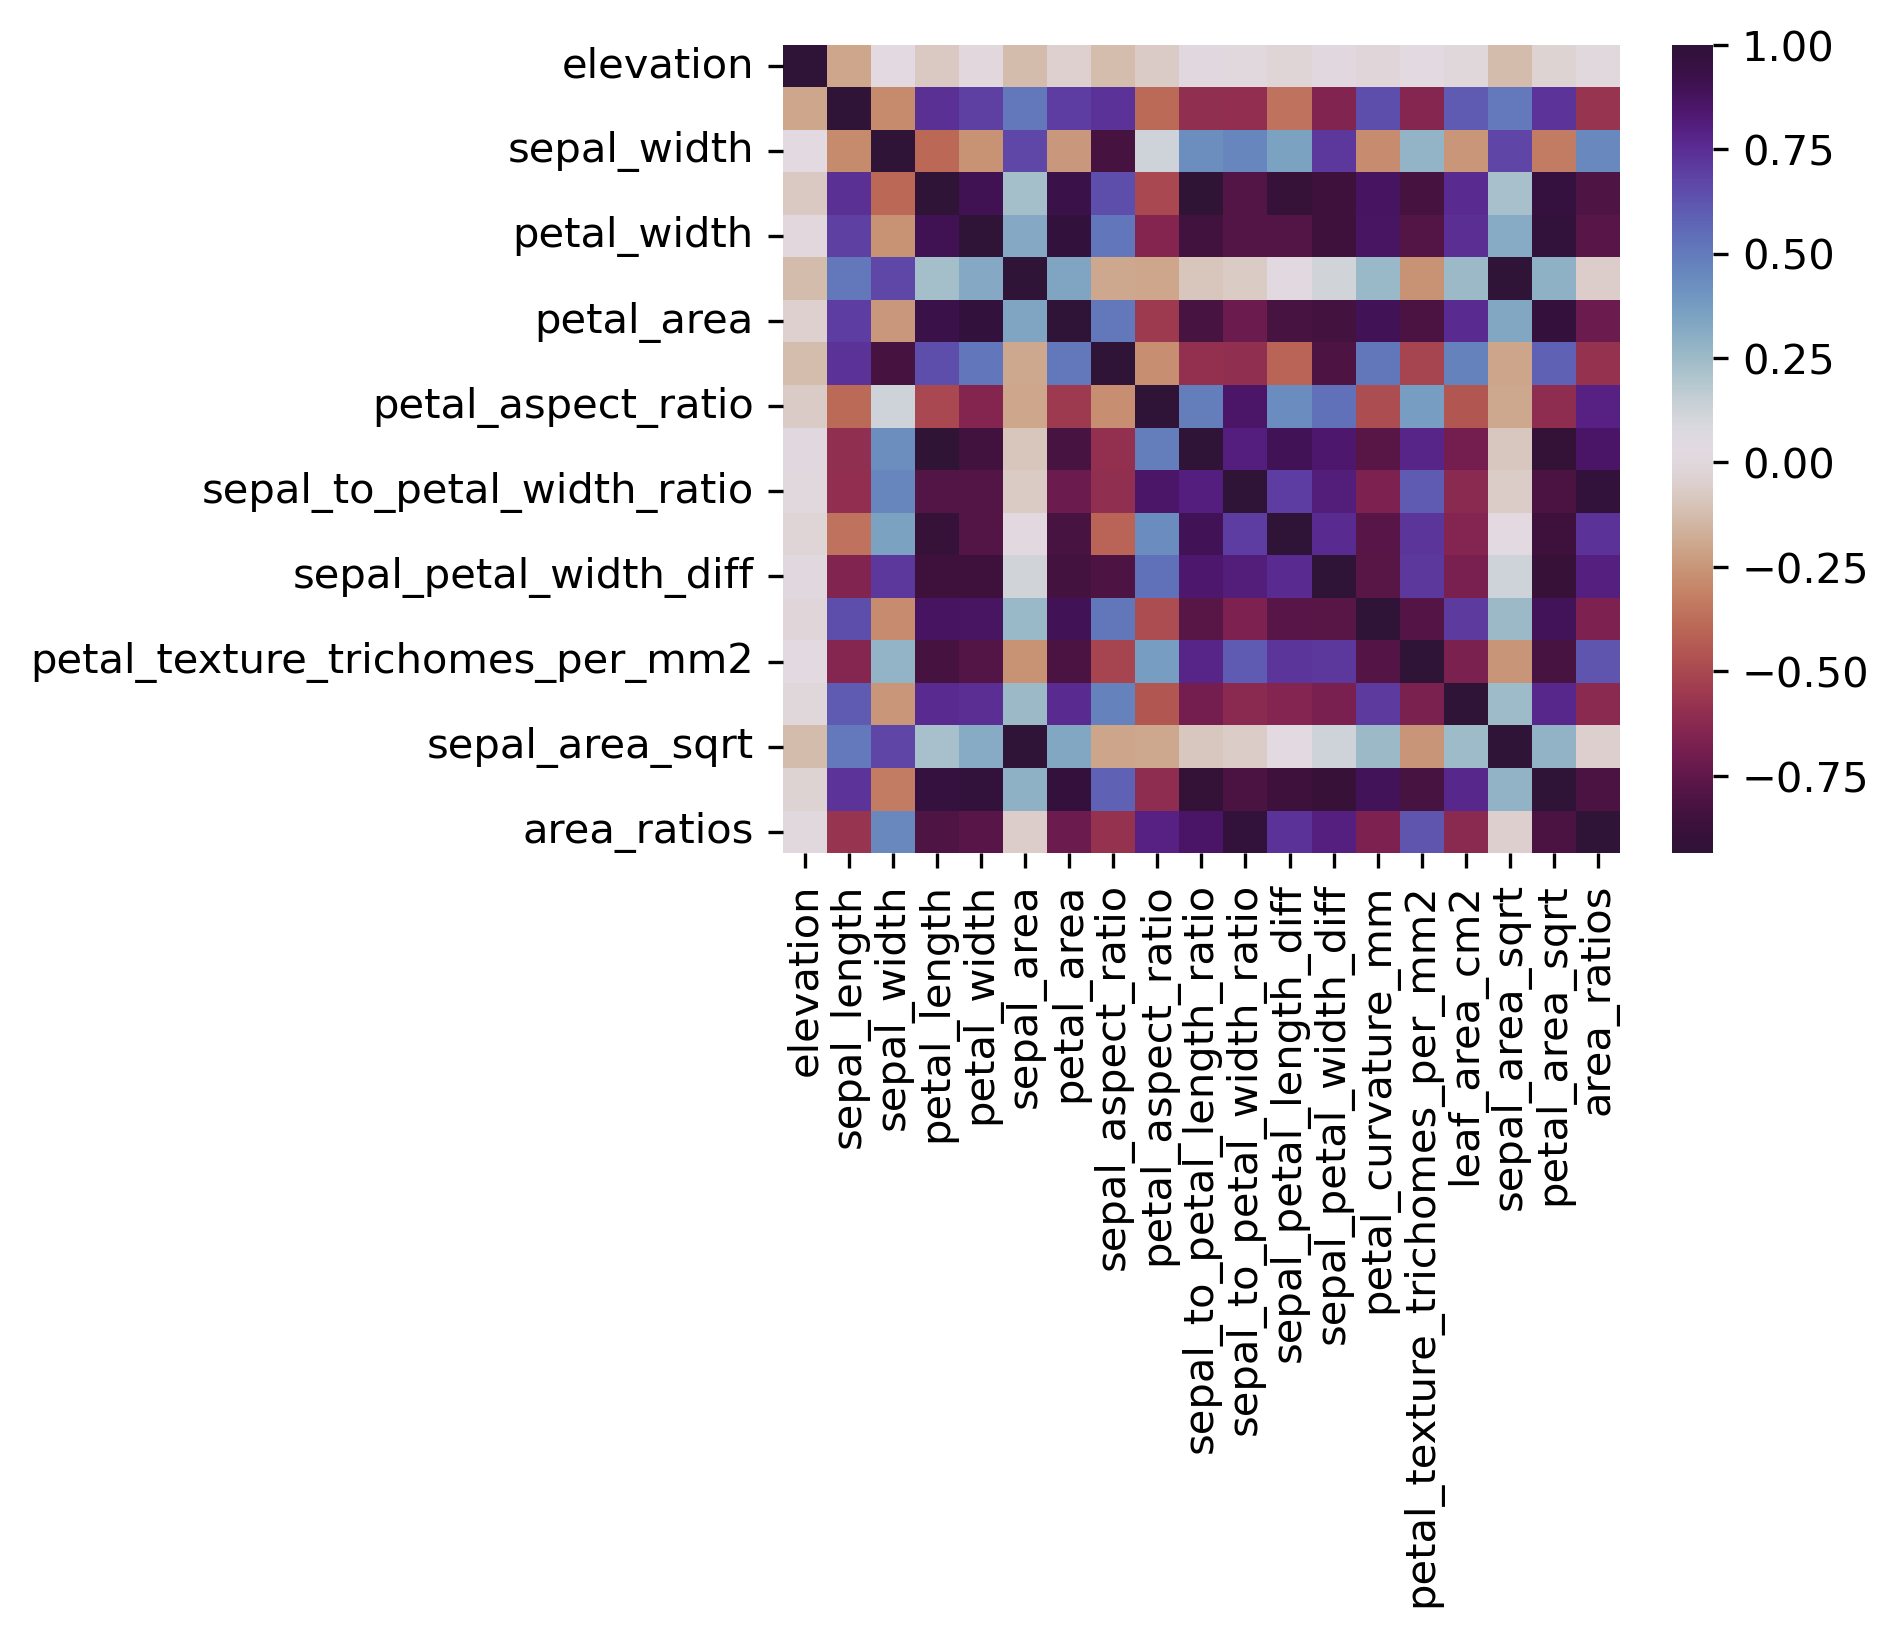

In [85]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, cmap=plt.cm.twilight_shifted_r)
plt.show()

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (4.5, 3.5)
color_map_hist = {'setosa': '#0044ff','versicolor': '#412fff','virginica': '#7e0fff'}
color_map_box = {'setosa': '#80A1FF', 'versicolor': '#A096FF', 'virginica': '#BF86FF'}
color_map_soil_hist = {'clay': '#e0802f', 'loamy': '#6d4d41', 'sandy':'#c09932'}
color_map_soil_box = {'clay': '#c06c36', 'loamy': '#6d4d41', 'sandy':'#ae9244'}

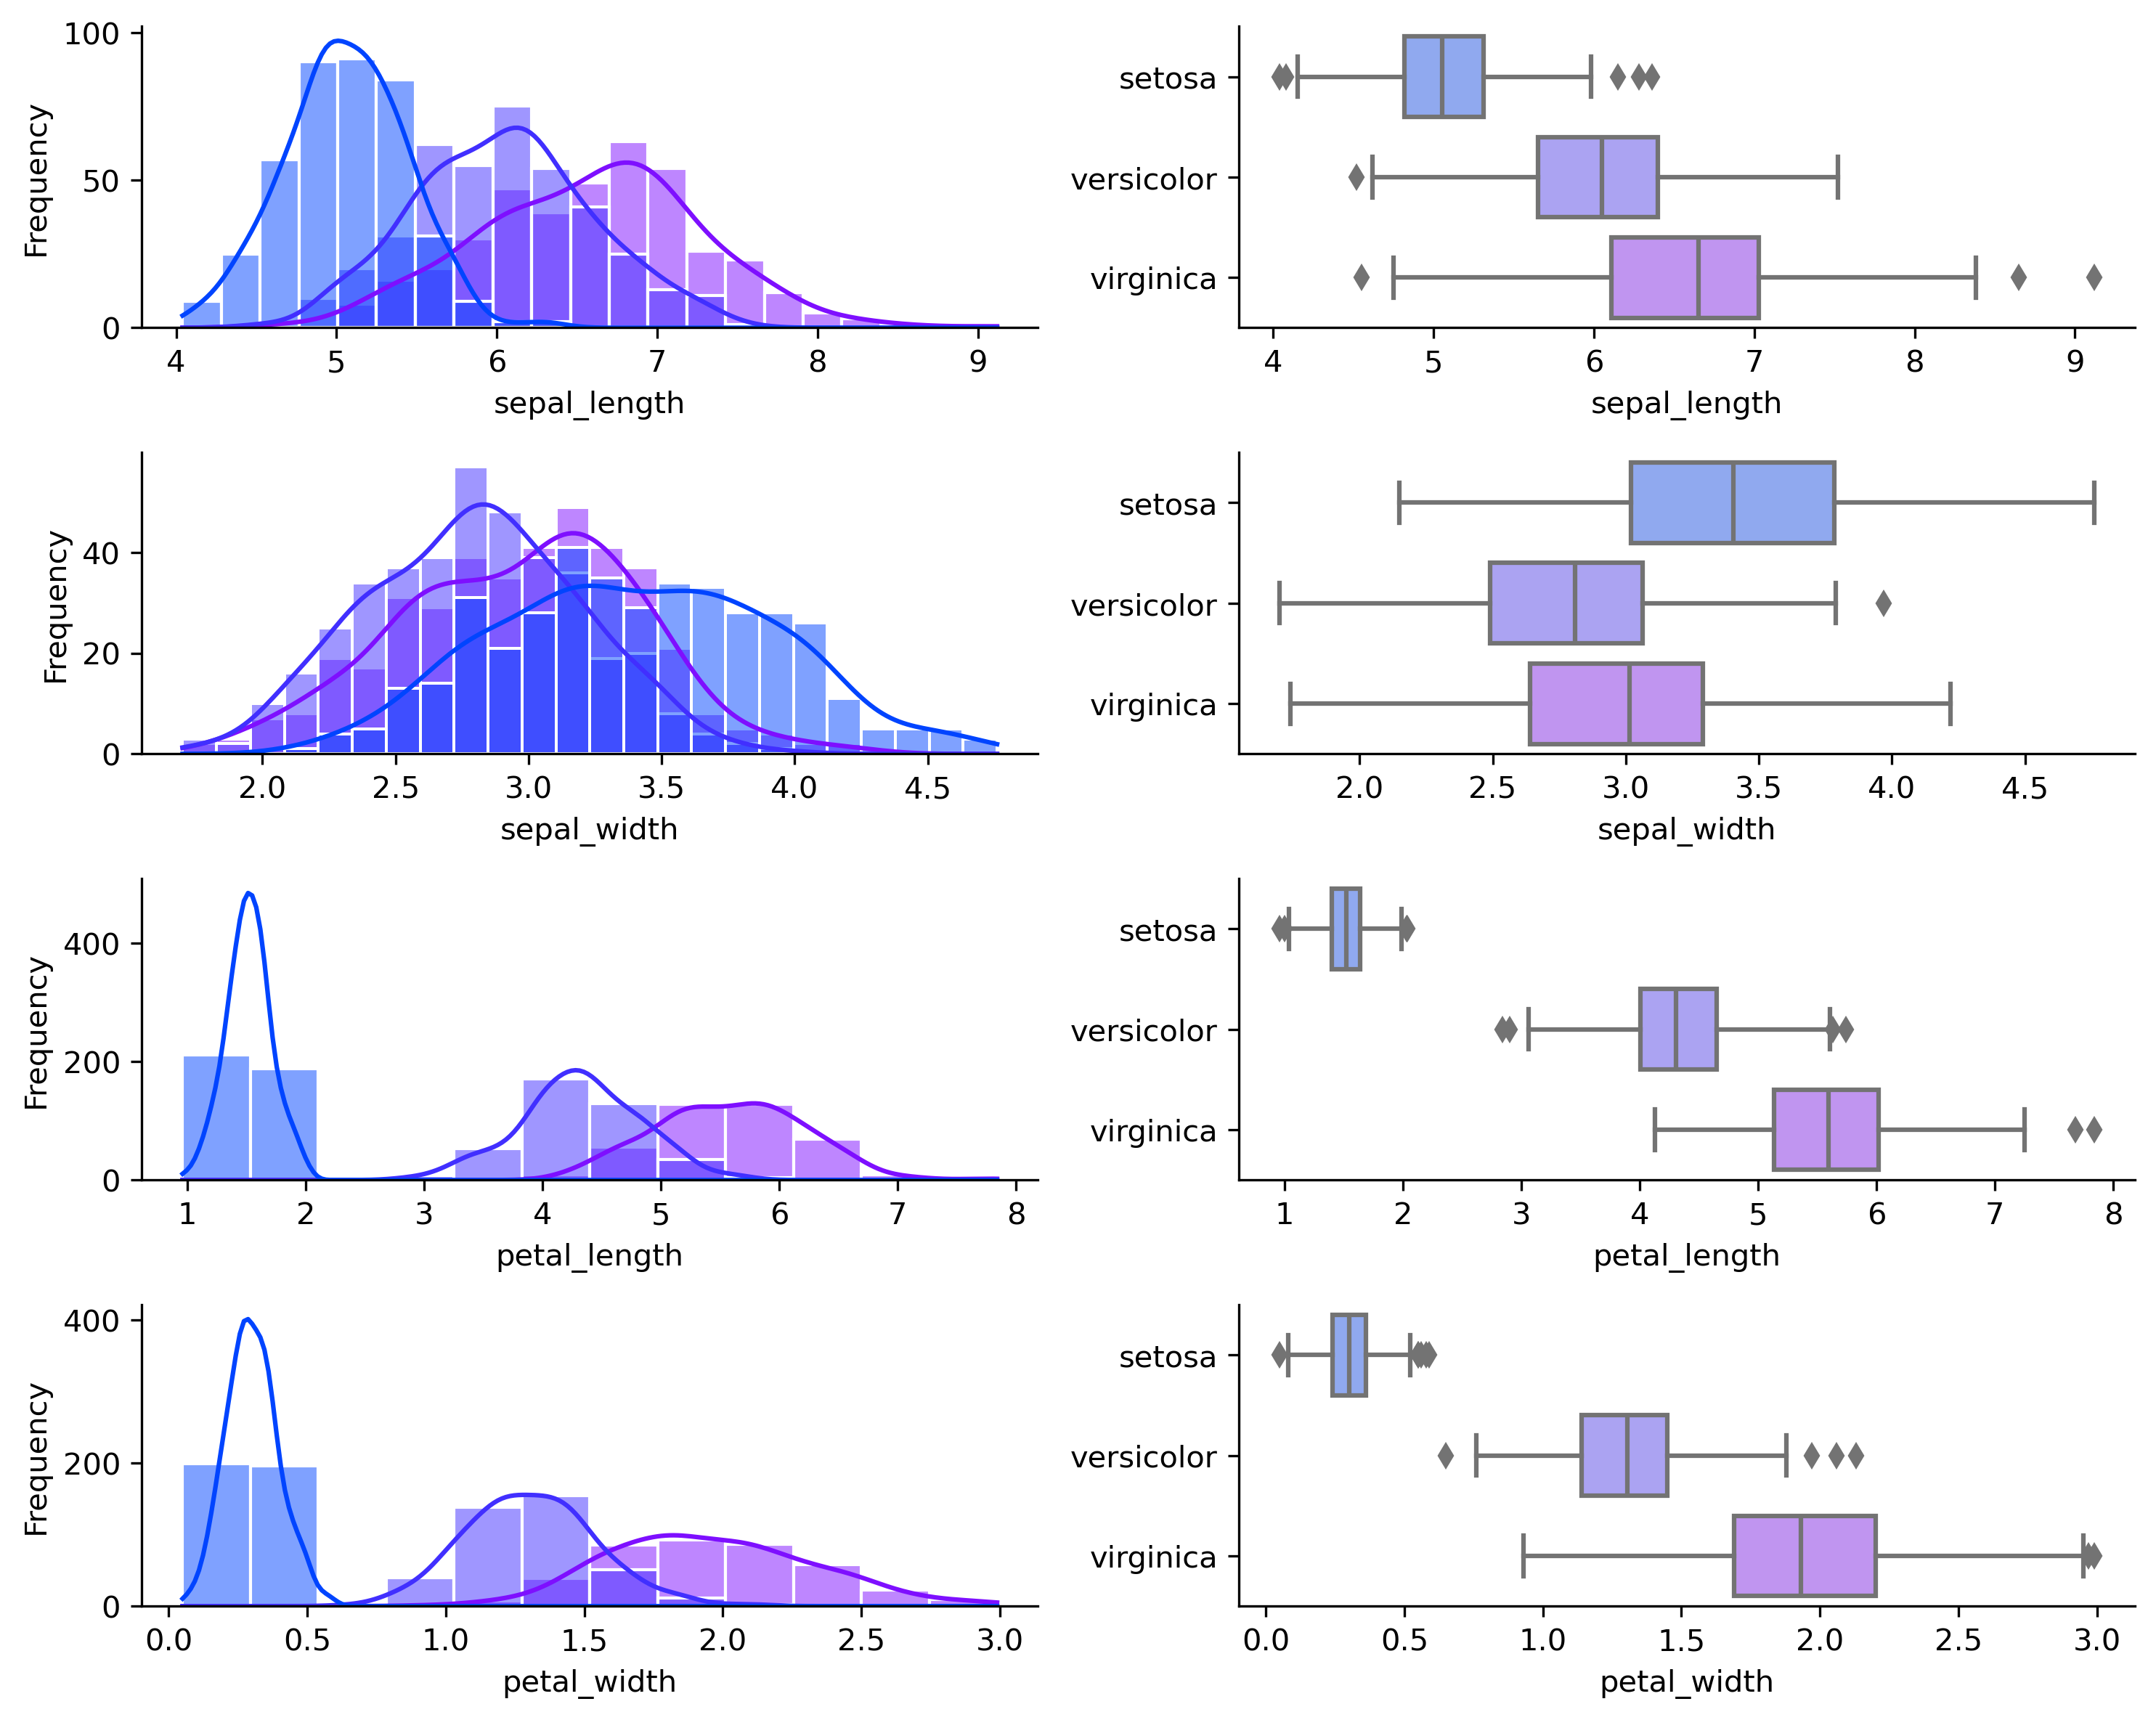

In [60]:
num_cols = ['sepal_length','sepal_width','petal_length', 'petal_width']

# Create subplots: 4 rows and 2 columns (1 for histogram, 1 for boxplot)
f, ax = plt.subplots(4, 2, figsize=(10, 8))

for i, col in enumerate(num_cols):
    # Plot histogram on the first column of the subplot
    sns.histplot(data=df, x=col, kde=True, ax=ax[i, 0], hue='species', edgecolor='white', palette=color_map_hist, legend=False)
    ax[i, 0].set_ylabel('Frequency')
    ax[i, 0].set_xlabel(col)
    
    # Plot boxplot on the second column of the subplot
    sns.boxplot(data=df, x=col, y='species', ax=ax[i, 1], palette=color_map_box)
    ax[i, 1].set_ylabel('')  # No y-label for clarity, as it's repeated from histogram

plt.tight_layout()
plt.show()

In [87]:
# CORRECTING COLUMN DATA TYPE
df = pd.read_csv("C:/Users/lokes/Downloads/iris_extended.csv")
df.species = df.species.astype('category')
df.soil_type = df.soil_type.astype('category')

temp = df.dtypes
numerical_features = list(temp[temp == 'float64'].keys())
categorical_features = ["soil_type"]

df.dtypes

species                            category
elevation                           float64
soil_type                          category
sepal_length                        float64
sepal_width                         float64
petal_length                        float64
petal_width                         float64
sepal_area                          float64
petal_area                          float64
sepal_aspect_ratio                  float64
petal_aspect_ratio                  float64
sepal_to_petal_length_ratio         float64
sepal_to_petal_width_ratio          float64
sepal_petal_length_diff             float64
sepal_petal_width_diff              float64
petal_curvature_mm                  float64
petal_texture_trichomes_per_mm2     float64
leaf_area_cm2                       float64
sepal_area_sqrt                     float64
petal_area_sqrt                     float64
area_ratios                         float64
dtype: object

In [88]:
# TRAIN TEST SPLIT
X = df.drop([TARGET_COLUMN],axis=1)
y = df[TARGET_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.10)

In [89]:
def pipelineCrossValidation(pipe,X,y):
    # CROSS VALIDATION
    crossValScores = cross_val_score(pipe,X_train,y_train)

    # TRAINING
    pipe.fit(X_train,y_train)

    # PREDICTING
    y_pred = pipe.predict(X_test)

    # RESULTS EVALUATION
    accuracy = pipe.score(X_test, y_test)

    # DISPLAYING RESULTS
    print("Cross Validation (Mean Accuracy):",round(crossValScores.mean() * 100,2))
    print(f"Accuracy\t\t\t:",round(accuracy * 100,2))
    display(pipe)
    
    return pipe

In [90]:
# PIPELINE
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

pipe_1 = pipelineCrossValidation(pipe,X_train,y_train)

Cross Validation (Mean Accuracy): 98.43
Accuracy			: 96.67


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['elevation', 'sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width', 'sepal_area',
                                                   'petal_area',
                                                   'sepal_aspect_ratio',
                                                   'petal_aspect_ratio',
                                                   'sepal_to_petal_length_ratio',
                                                   'sepal_to_petal_width_ratio',
                                                   'se...ength_diff',
                                                   'sepal_petal_width_diff',
                                                   'petal_curvature_mm',
                                                   'petal_texture_trichomes_per_mm2',
                                                   'leaf_area_cm2',
                                                   'sepal_area_sqrt',
                                                   'petal_area_sqrt',
                                                   'area_ratios']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['soil_type'])])),
                ('classifier', DecisionTreeClassifier())])

In [91]:
# PIPELINE
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('classifier', DecisionTreeClassifier())
])
pipe_2 = pipelineCrossValidation(pipe,X_train,y_train)

Cross Validation (Mean Accuracy): 97.69
Accuracy			: 96.67


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['elevation', 'sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width', 'sepal_area',
                                                   'petal_area',
                                                   'sepal_aspect_ratio',
                                                   'petal_aspect_ratio',
                                                   'sepal_to_petal_length_ratio',
                                                   'sepal_to_petal_width_ratio',
                                                   'sepal_petal_length_diff',
                                                   'sepa...
                                                   'petal_curvature_mm',
                                                   'petal_texture_trichomes_per_mm2',
                                                   'leaf_area_cm2',
                                                   'sepal_area_sqrt',
                                                   'petal_area_sqrt',
                                                   'area_ratios']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['soil_type'])])),
                ('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', DecisionTreeClassifier())])

In [92]:
# PIPELINE
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('pca',PCA()),
    ('classifier', DecisionTreeClassifier())
])

pipe_3 = pipelineCrossValidation(pipe,X_train,y_train)

Cross Validation (Mean Accuracy): 98.06
Accuracy			: 98.33


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['elevation', 'sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width', 'sepal_area',
                                                   'petal_area',
                                                   'sepal_aspect_ratio',
                                                   'petal_aspect_ratio',
                                                   'sepal_to_petal_length_ratio',
                                                   'sepal_to_petal_width_ratio',
                                                   'sepal_petal_length_diff',
                                                   'sepa...
                                                   'petal_curvature_mm',
                                                   'petal_texture_trichomes_per_mm2',
                                                   'leaf_area_cm2',
                                                   'sepal_area_sqrt',
                                                   'petal_area_sqrt',
                                                   'area_ratios']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['soil_type'])])),
                ('scaler', MinMaxScaler()), ('pca', PCA()),
                ('classifier', DecisionTreeClassifier())])

In [93]:
# SAVING TO DISK
MODEL_SAVE_DIR = "./ML_models/"
MODEL_NAME = "DecisionTreeClf_pipe_(Acc:96.67).pkl"
Path(MODEL_SAVE_DIR).mkdir(parents=True, exist_ok=True)
joblib.dump(pipe_1,os.path.join(MODEL_SAVE_DIR,MODEL_NAME))

['./ML_models/DecisionTreeClf_pipe_(Acc:96.67).pkl']

In [94]:
loaded_pipe = joblib.load(os.path.join(MODEL_SAVE_DIR,MODEL_NAME))
loaded_pipe.score(X_test,y_test)

0.9666666666666667